# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment
Run the next code cell to install a few packages and import that.
This line will take a few minutes to run!
We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

**_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Tennis.app"`
- **Windows** (x86): `"path/to/Tennis_Windows_x86/Tennis.exe"`
- **Windows** (x86_64): `"path/to/Tennis_Windows_x86_64/Tennis.exe"`
- **Linux** (x86): `"path/to/Tennis_Linux/Tennis.x86"`
- **Linux** (x86_64): `"path/to/Tennis_Linux/Tennis.x86_64"`
- **Linux** (x86, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86"`
- **Linux** (x86_64, headless): `"path/to/Tennis_Linux_NoVis/Tennis.x86_64"`

For instance, if you are using a Mac, then you downloaded `Tennis.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Tennis.app")
```

In [3]:
!pip -q install ./python
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 2. Training Process and Result

This code is about training model and output is about training result

cuda:0
24 2
Episode 4	Average Score: -0.00	Cur Score: -0.00	t:15	replaybuffersize=116

/home/workspace/ddpg_agent.py:118: UserWarning: torch.nn.utils.clip_grad_norm is now deprecated in favor of torch.nn.utils.clip_grad_norm_.
  torch.nn.utils.clip_grad_norm(self.critic_local.parameters(), 1)


Episode 100	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=3218


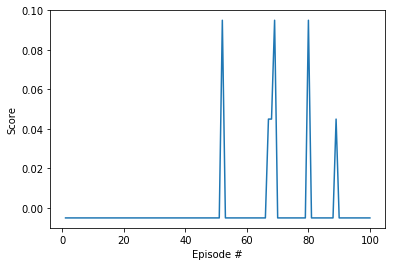

Episode 200	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=6226


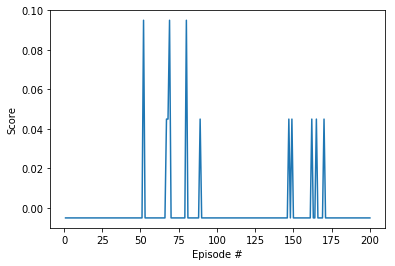

Episode 300	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=9070


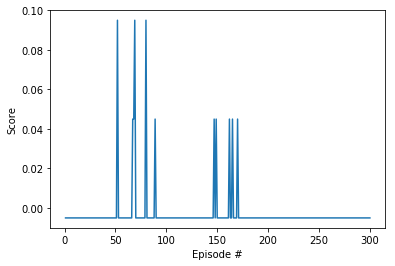

Episode 400	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=11910


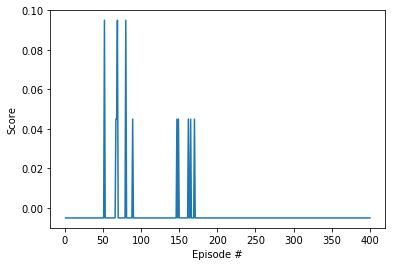

Episode 500	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=14750


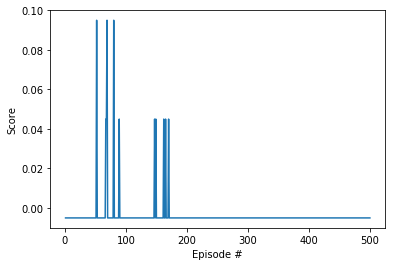

Episode 600	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=17618


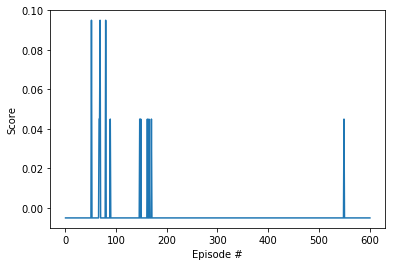

Episode 700	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=20458


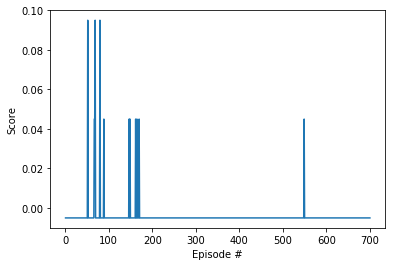

Episode 800	Average Score: 0.01	Cur Score: -0.00	t:15	replaybuffersize=247024


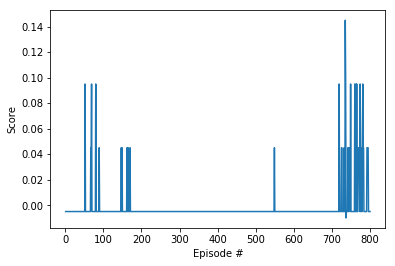

Episode 900	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=27572


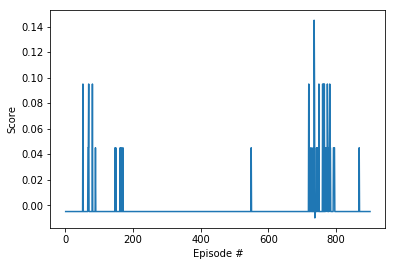

Episode 1000	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=30442


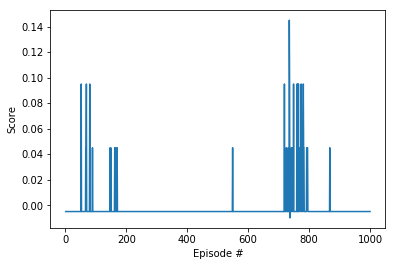

Episode 1100	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=33282


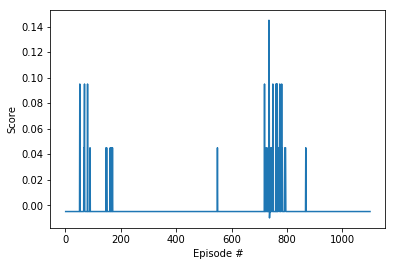

Episode 1200	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=36122


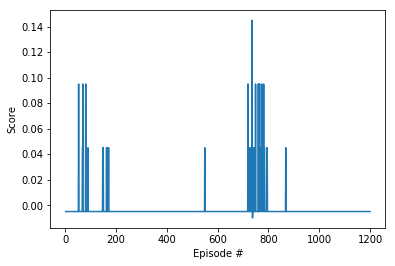

Episode 1300	Average Score: -0.00	Cur Score: -0.00	t:14	replaybuffersize=39144


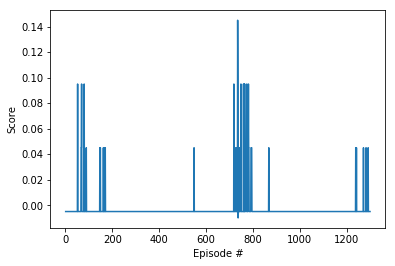

Episode 1400	Average Score: 0.00	Cur Score: -0.00	t:15	replaybuffersize=426140


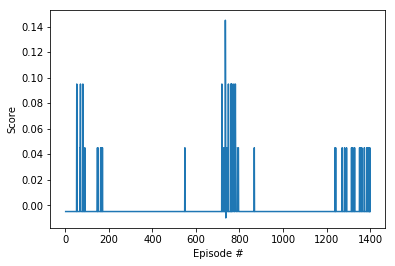

Episode 1500	Average Score: 0.01	Cur Score: -0.00	t:14	replaybuffersize=46252


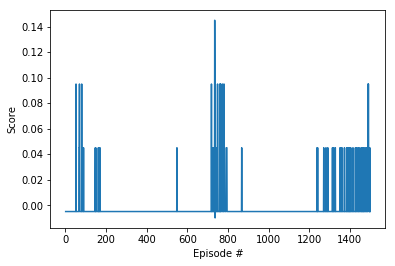

Episode 1600	Average Score: 0.01	Cur Score: 0.05	t:32	replaybuffersize=500000


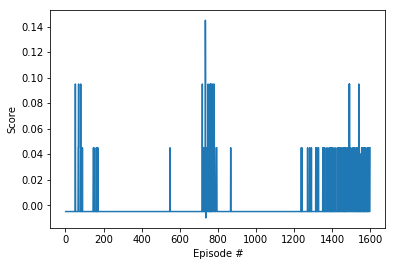

Episode 1700	Average Score: 0.00	Cur Score: 0.05	t:32	replaybuffersize=500000


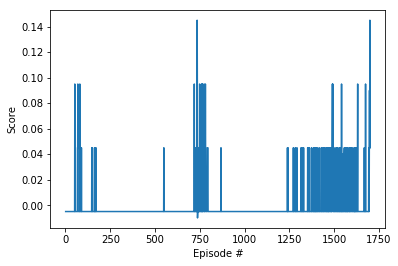

Episode 1800	Average Score: 0.03	Cur Score: 0.10	t:53	replaybuffersize=500000


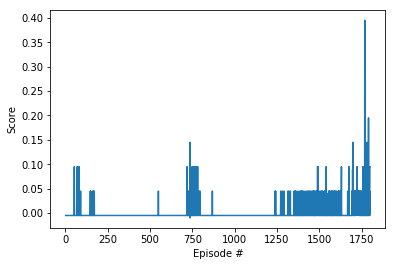

Episode 1900	Average Score: 0.06	Cur Score: -0.00	t:14	replaybuffersize=50000


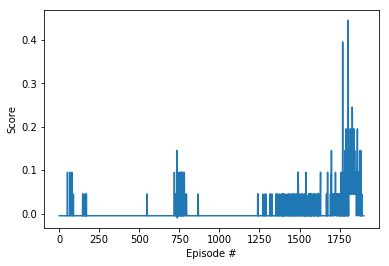

Episode 2000	Average Score: 0.04	Cur Score: 0.10	t:53	replaybuffersize=500000


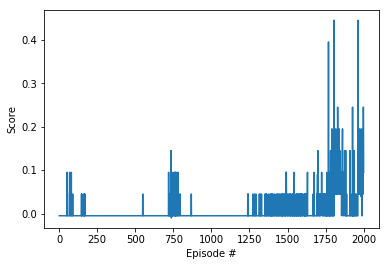

Episode 2100	Average Score: 0.17	Cur Score: 0.25	t:144	replaybuffersize=50000


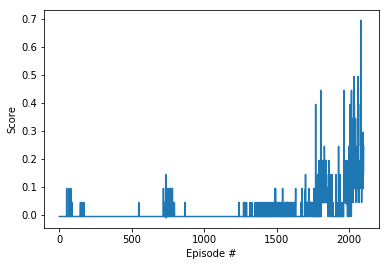

Episode 2200	Average Score: 0.15	Cur Score: 0.15	t:78	replaybuffersize=500000


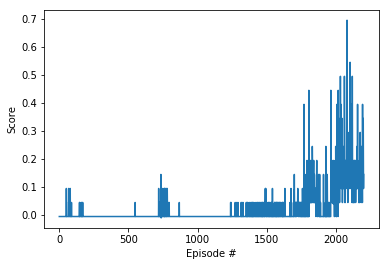

Episode 2300	Average Score: 0.15	Cur Score: 0.05	t:32	replaybuffersize=500000


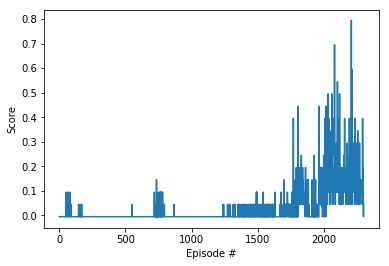

Episode 2400	Average Score: 0.09	Cur Score: 0.10	t:49	replaybuffersize=500000


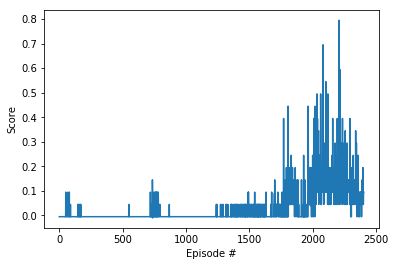

Episode 2500	Average Score: 0.17	Cur Score: 0.60	t:237	replaybuffersize=50000


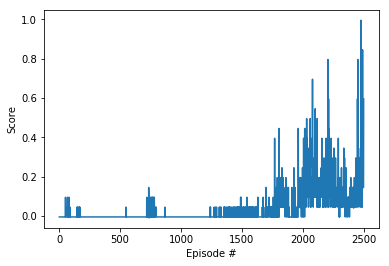

Episode 2600	Average Score: 0.16	Cur Score: 0.05	t:47	replaybuffersize=500000


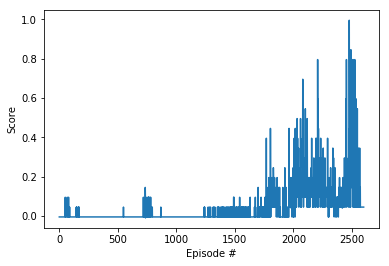

Episode 2700	Average Score: 0.10	Cur Score: 0.05	t:31	replaybuffersize=500000


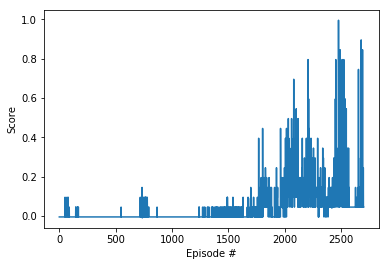

Episode 2800	Average Score: 0.15	Cur Score: -0.00	t:15	replaybuffersize=50000


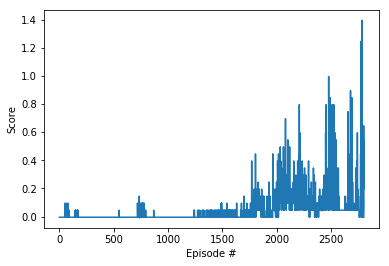

Episode 2900	Average Score: 0.16	Cur Score: 1.90	t:728	replaybuffersize=50000


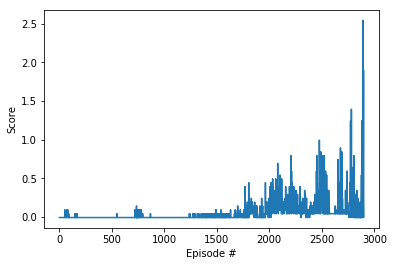

Episode 3000	Average Score: 0.09	Cur Score: 0.05	t:31	replaybuffersize=500000


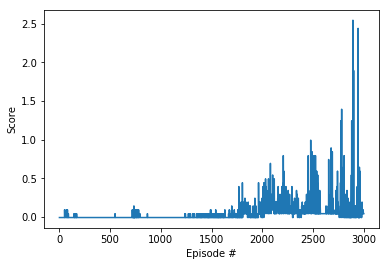

Episode 3100	Average Score: 0.16	Cur Score: 2.65	t:1001	replaybuffersize=50000


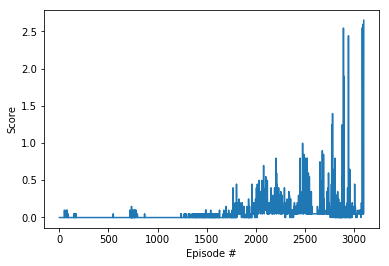

Episode 3200	Average Score: 0.08	Cur Score: 0.05	t:30	replaybuffersize=5000000


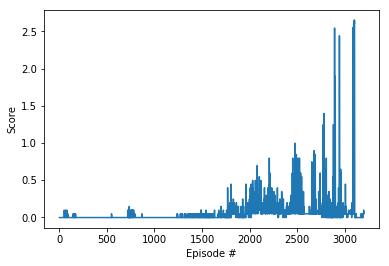

Episode 3300	Average Score: 0.11	Cur Score: 0.15	t:97	replaybuffersize=500000


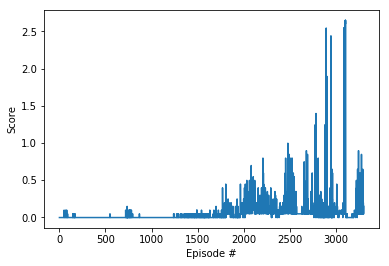

Episode 3400	Average Score: 0.32	Cur Score: -0.00	t:1	replaybuffersize=5000000


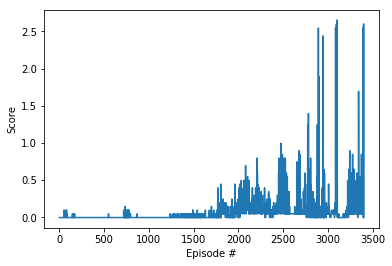

Episode 3500	Average Score: 0.28	Cur Score: -0.00	t:14	replaybuffersize=500000


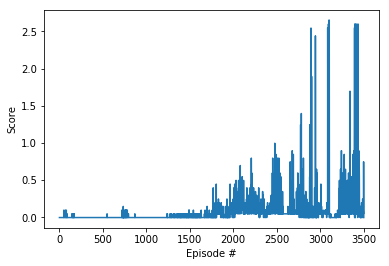

Episode 3600	Average Score: 0.20	Cur Score: -0.00	t:14	replaybuffersize=500000


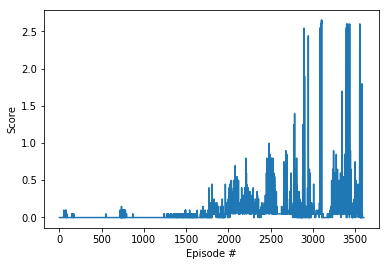

Episode 3700	Average Score: 0.13	Cur Score: -0.00	t:14	replaybuffersize=50000


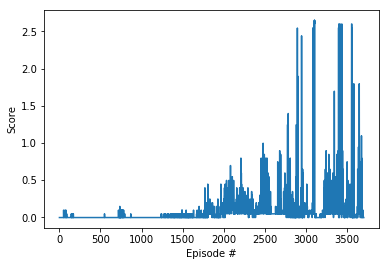

Episode 3800	Average Score: 0.04	Cur Score: 0.05	t:34	replaybuffersize=5000000


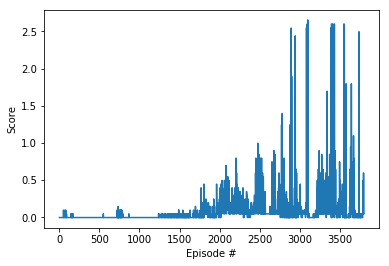

Episode 3900	Average Score: 0.93	Cur Score: 1.75	t:693	replaybuffersize=500000


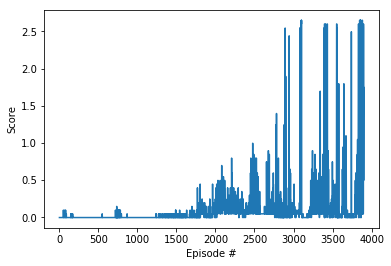

Episode 4000	Average Score: 0.62	Cur Score: 0.30	t:132	replaybuffersize=500000


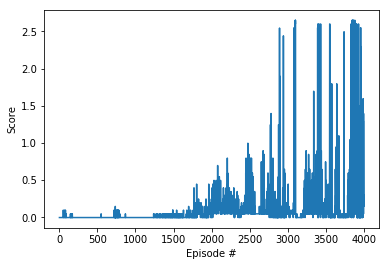

Episode 4100	Average Score: 0.23	Cur Score: 0.05	t:30	replaybuffersize=5000000


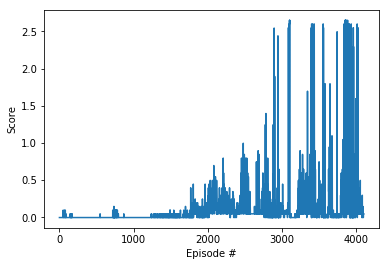

Episode 4200	Average Score: 0.43	Cur Score: 0.05	t:50	replaybuffersize=5000000


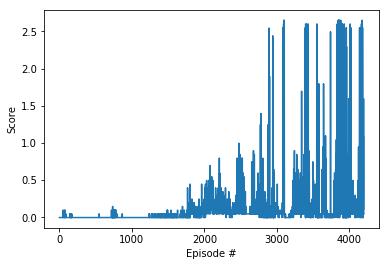

Episode 4300	Average Score: 0.34	Cur Score: -0.00	t:14	replaybuffersize=500000


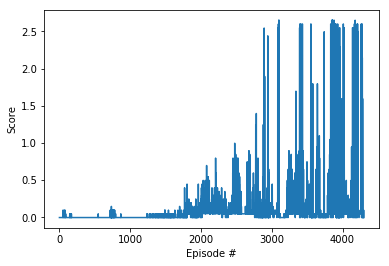

Episode 4400	Average Score: 0.02	Cur Score: 0.10	t:54	replaybuffersize=500000


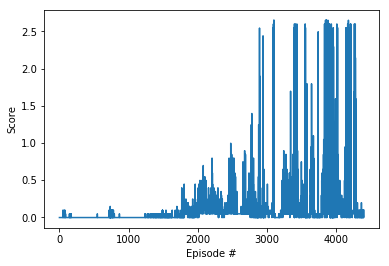

Episode 4500	Average Score: 0.32	Cur Score: 0.10	t:29	replaybuffersize=5000000


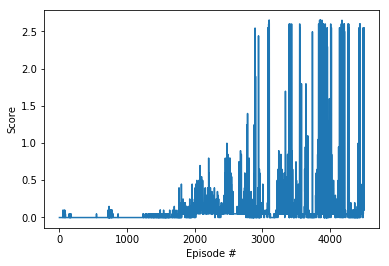

Episode 4600	Average Score: 0.86	Cur Score: -0.00	t:13	replaybuffersize=500000


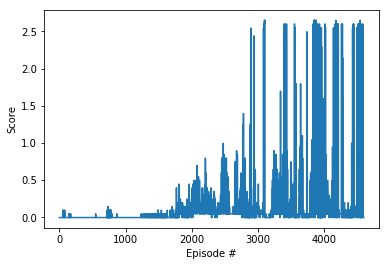

Episode 4700	Average Score: 0.85	Cur Score: 0.05	t:29	replaybuffersize=5000000


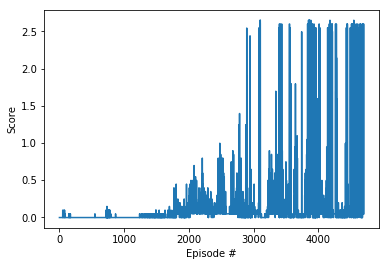

Episode 4800	Average Score: 0.56	Cur Score: 0.05	t:34	replaybuffersize=5000000


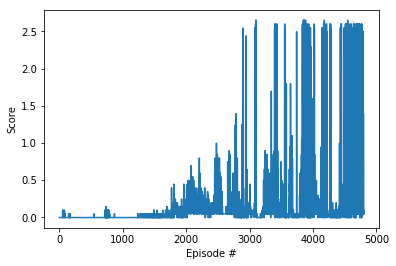

Episode 4900	Average Score: 1.18	Cur Score: -0.00	t:3	replaybuffersize=5000000


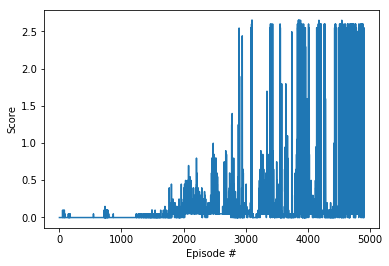

Episode 5000	Average Score: 0.63	Cur Score: 2.45	t:960	replaybuffersize=500000


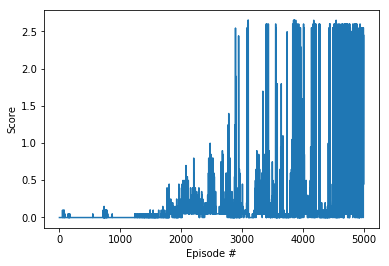

In [4]:
%load_ext autoreload
%autoreload 2

from ddpg_agent import Agent

def print_env_info(env_info):
    for i in range(num_agents):
        next_state = env_info.vector_observations[i]         # get next state (for each agent)
        reward = env_info.rewards[i]                         # get reward (for each agent)
        print(next_state)
        print(reward)

def ddpg(n_episodes=5000, print_every=100):
    scores_deque = deque(maxlen=print_every)
    scores = []
    print(state_size, action_size)
    agent = Agent(state_size=state_size, action_size=action_size, random_seed=2154, num_agents=num_agents)
    env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
    states = env_info.vector_observations
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]      # reset the environment
        agent.reset()
        score = 0
        t=0
        while True:
            t=t+1 
            
            action = agent.act(states, False)
            #print(action.shape)
            #print(action)
            env_info = env.step(action)[brain_name]           # send all actions to tne environment
            #print_env_info(env_info)
            next_states = env_info.vector_observations
            rewards = env_info.rewards
            dones = env_info.local_done
            score += np.mean(env_info.rewards)
            agent.step(states, action, rewards, next_states, dones)
            states = next_states
            
            if np.any(dones):                                  # exit loop if episode finished
                break

        scores_deque.append(score)
        scores.append(score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tCur Score: {:.2f}\tt:{}\treplaybuffersize={}'.format(i_episode, np.mean(scores_deque), score, t, agent.memory.__len__()), end="")
        
        if i_episode % print_every == 0:
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            fig = plt.figure()
            ax = fig.add_subplot(111)
            plt.plot(np.arange(1, len(scores)+1), scores)
            plt.ylabel('Score')
            plt.xlabel('Episode #')
            plt.show()
            
    return scores

scores = ddpg()

### 3. Play with Trained Model

In [5]:
from ddpg_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, random_seed=26, num_agents=num_agents)
agent.actor_local.load_state_dict(torch.load('checkpoint_actor.pth'))
agent.critic_local.load_state_dict(torch.load('checkpoint_critic.pth'))
env_info = env.reset(train_mode=False)[brain_name]      # reset the environment    

states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = agent.act(states, False)
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 2.550000037997961


### 4. Take Compare with Random Actions in the Environment

In [5]:
for i in range(1, 6):                                      # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Score (max over agents) from episode {}: {}'.format(i, np.max(scores)))

Score (max over agents) from episode 1: 0.0
Score (max over agents) from episode 2: 0.0
Score (max over agents) from episode 3: 0.0
Score (max over agents) from episode 4: 0.0
Score (max over agents) from episode 5: 0.09000000171363354
